Recurrent Neutral Networks

https://en.wikipedia.org/wiki/Recurrent_neural_network

1. Einführung in RNNs
Ziel:

Das Konzept von RNNs und die Besonderheiten gegenüber Feed-Forward Neural Networks (FFNN) zu erkennen.



Inhalt:

- Was sind RNNs?:

  - RNNs sind neuronale Netze, die für die Arbeit mit Sequenzdaten wie Zeitreihen, Text oder Audio entwickelt wurden.
  - Sie besitzen die Fähigkeit, Informationen über Sequenzen hinweg beizubehalten und zu verarbeiten, da die Ausgaben früherer Schritte als Eingaben für spätere Schritte genutzt werden.

- Unterschied zu FFNNs:

  - In Feed-Forward-Netzen gibt es keinen Zusammenhang zwischen den Eingaben über verschiedene Zeitpunkte hinweg.
  - In RNNs gibt es Verbindungen von einem Schritt zum nächsten, sodass das Netzwerk Informationen früherer Schritte "merkt".

- Anwendungsgebiete von RNNs:

  - Zeitreihenanalyse (z. B. Aktienkurse, Wetterdaten)
  - Spracherkennung
  - Maschinelle Übersetzung
  - Textvorhersage

- Visualisierung/Beispiele:


![Recurrent Neutral Network](figure_rnn_2.jpg)


Bild ist aus file:///C:/Users/geise/OneDrive/Desktop/JOB_ENDERS_2024/KURS_1_2_PCED_2024/Literatur_2024/ISLP_python_2024.pdf

Erläuterung: RNN ist als eine Einheit darstellt. Die Eingaben sind mit X gegeben, A sind die Aktivierungsfunktionen, Die Gewichte sind mit W, U und B gegeben. Die Ausgabe mit O.






2. Theorie: Aufbau und Architektur von RNNs (10 Minuten)
Ziel:
Verstehen, wie RNNs aufgebaut sind und wie sie funktionieren.

Inhalt:
Architektur eines RNN:

Das RNN verarbeitet Sequenzen Schritt für Schritt und nutzt dabei vergangene Informationen durch "Recurrent Connections".
Verarbeitung von Sequenzen:

In jedem Schritt erhält das RNN sowohl eine Eingabe der aktuellen Sequenz als auch die Ausgabe des vorherigen Schritts.
Mathematische Grundlagen:




Die versteckte Zustandsvariable $ h_t $ eines RNN zu einem Zeitpunkt $ t $ wird berechnet als:

$$
h_t = f(W_h \cdot h_{t-1} + W_x \cdot x_t + b)
$$

wobei \( f \) eine Aktivierungsfunktion wie $ \tanh $ ist.

Erklärung:

- $ h_t $ ist der versteckte Zustand zum Zeitpunkt $ t $.
- $ h_{t-1} $ ist der versteckte Zustand vom vorherigen Zeitpunkt $ t-1 $.
- $ x_t $ ist der Eingabevektor zum Zeitpunkt $ t $.
- $ W_h $ und $ W_x $ sind Gewichtsmatrizen, die während des Trainings gelernt werden.
- $ b $ ist der Bias-Term, der ebenfalls gelernt wird.
- $ f $ ist eine nichtlineare Aktivierungsfunktion, wie z. B. $ \tanh $ oder $ \text{ReLU} $.



Probleme in RNNs:

- Vanishing Gradient: Bei langen Sequenzen verlieren RNNs oft die Fähigkeit, Informationen über große Distanzen zu erinnern.
- Exploding Gradient: In bestimmten Fällen können die Gradienten in den frühen Schichten sehr groß werden.





3. Praxis: Implementierung eines einfachen RNNs mit TensorFlow (15 Minuten)

Ziel:
Die Schüler sollen lernen, ein einfaches RNN-Modell in TensorFlow zu implementieren.

Codebeispiel:

Hier ist ein einfaches Beispiel, das eine Sequenz von Zahlen vorhersagt:

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Beispiel-Datensatz: Zeitreihenvorhersage
# Wir erstellen eine einfache Sequenz
X = np.array([[i, i+1, i+2] for i in range(10)])  # Sequenzen
y = np.array([i+3 for i in range(10)])            # Vorhersagewerte

# Umformen in das RNN-Format: [Batchgröße, Zeitstufen, Features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Erstellen des RNN-Modells
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    Dense(1)
])

# Kompilieren des Modells
model.compile(optimizer='adam', loss='mse')

# Modell-Training
model.fit(X, y, epochs=200, verbose=0)

# Vorhersagen auf Basis des trainierten Modells
y_pred = model.predict(X)
print(f"Vorhersage: {y_pred.flatten()}")


c:\Users\geise\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
Vorhersage: [ 1.8864248  3.0629852  4.2459917  5.430604   6.616392   7.80292
  8.99155   10.18018   11.36881   12.557824 ]


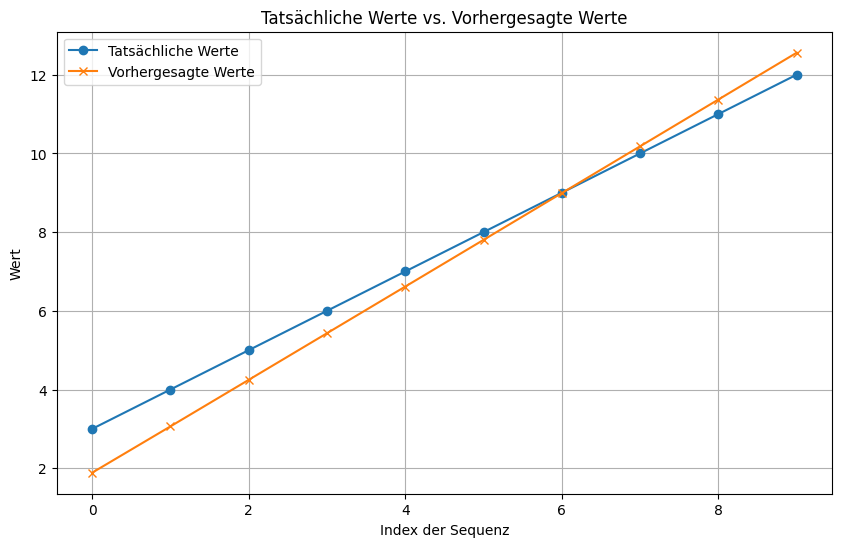

In [2]:
import matplotlib.pyplot as plt

# Grafische Darstellung der Sequenzen und Vorhersagen
plt.figure(figsize=(10, 6))
plt.plot(y, label='Tatsächliche Werte', marker='o')
plt.plot(y_pred.flatten(), label='Vorhergesagte Werte', marker='x')

plt.title('Tatsächliche Werte vs. Vorhergesagte Werte')
plt.xlabel('Index der Sequenz')
plt.ylabel('Wert')
plt.legend()
plt.grid(True)
plt.show()

Erklärung des Codes:

- SimpleRNN: Der Kernbaustein des Modells, der die Sequenzen verarbeitet.
- Dense-Schicht: Die letzte Schicht, die eine Ausgabe liefert.
- Input Shape: Die Eingabedaten haben eine dreidimensionale Form: [Batchgröße, Zeitstufen, Features].

Aufgabe:

- Modifizieren Sie das Beispiel, um eine längere Sequenz oder eine komplexere Aufgabe zu lösen.
- Beobachten Sie, wie sich die Vorhersagen ändern.


4. Erweiterung: LSTMs und GRUs

Ziel: Weiterentwicklungen von RNNs verstehen.

Inhalt:
- Long Short-Term Memory (LSTM):

    - LSTMs sind eine spezielle Art von RNN, die das Problem des "Vanishing Gradient" lösen können.
    - Sie nutzen "Gates", um zu entscheiden, welche Informationen behalten oder vergessen werden.

- Gated Recurrent Unit (GRU):

    - GRUs sind ähnlich wie LSTMs, aber etwas einfacher, da sie weniger Parameter haben.



Beispiel-Code für ein LSTM-Modell:

In [3]:
from tensorflow.keras.layers import LSTM

# LSTM-Modell statt SimpleRNN
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    Dense(1)
])

# Kompilieren und trainieren
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=200, verbose=0)


c:\Users\geise\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:

# Vorhersagen auf Basis des trainierten Modells
y_pred = model.predict(X)
print(f"Vorhersage: {y_pred.flatten()}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Vorhersage: [ 1.0222445  1.8211818  2.8545752  4.092558   5.489871   6.9942493
  8.564638  10.17239   11.799892  13.437092 ]


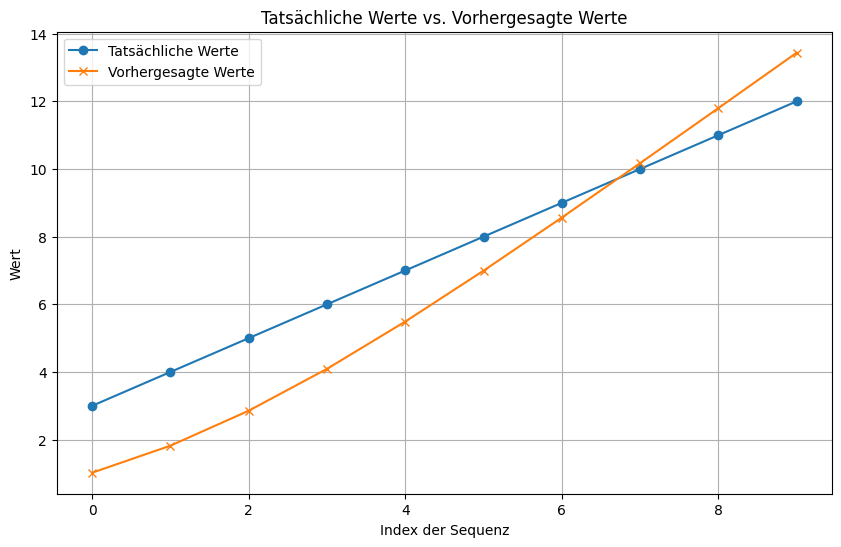

In [5]:
import matplotlib.pyplot as plt

# Grafische Darstellung der Sequenzen und Vorhersagen
plt.figure(figsize=(10, 6))
plt.plot(y, label='Tatsächliche Werte', marker='o')
plt.plot(y_pred.flatten(), label='Vorhergesagte Werte', marker='x')

plt.title('Tatsächliche Werte vs. Vorhergesagte Werte')
plt.xlabel('Index der Sequenz')
plt.ylabel('Wert')
plt.legend()
plt.grid(True)
plt.show()

5. Zusammenfassung und Fragen

Ziel: Eine Wiederholung der Kernkonzepte und Klärung von Fragen.

Inhalt:

- Zusammenfassung der wichtigsten Konzepte:
    - RNNs und ihre Rolle bei der Verarbeitung von Sequenzdaten.
    - Implementierung eines einfachen RNNs in TensorFlow.
    - Unterschied zwischen RNN, LSTM und GRU.

Diskussionsfragen:

- Wo könnten Sie RNNs in realen Anwendungen einsetzen?
- Welche Probleme haben RNNs bei langen Sequenzen?